# US ACCIDENTS EDA
TODO- talk about EDA

TODO - talk about the dataset(source,what it contains, how will it be useful)
- Kaggle
- Information about accidents
- Can be useful to prevent accidents

TODO - Mention that it does not contain data about New York

## Download the data


## Data preparation and Cleaning

- Load the files using pandas
- look at some info about the data and columns
- Fix any missing or incorrect values

In [265]:
from itertools import count
from unicodedata import numeric

import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from folium.plugins import HeatMap
from matplotlib import pyplot as plt
from seaborn import heatmap

df=pd.read_csv('US_Accidents_March23.csv')

In [3]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
# Counting numeric vakues
import numpy as np
numerica=df.select_dtypes(include=[np.number])
len(numerica.columns)

13

In [7]:
# finding missing values and sorting it in descending
missing_percentages=df.isnull().sum().sort_values(ascending=False)/len(df)
# now removing 0 values in the percentages

missing_percentages_without_missing=missing_percentages[missing_percentages>0]
# Whenever we have  boolean series we can keep it as an index as it will keep the values only those which has boolean value equals to true


<Axes: >

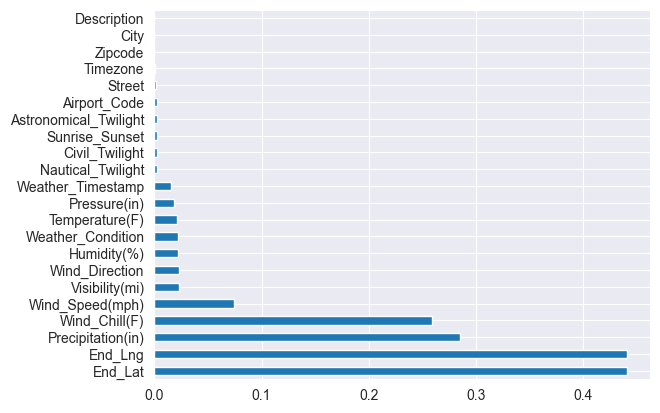

In [8]:
missing_percentages_without_missing.plot(kind='barh')

In [9]:
# if you see something is missing more than half the times like tmc,end_lng ,end_lat then you can drop it as it does not have any severe impact on the dataset
df.drop(['End_Lat','End_Lng'],axis=1)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day


## Exploratory Analysis and Visualizations
- If we are working in a company then we will have columns that match our project problem description
- If we are doing general analysis then we have to read all the columns and then analyse which columns we are interested in


### Columns that we will analyse
- city
- start time
- start lat
- start long
- temperature
- weather condition

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
# we start with city
cities=df.City.unique()
len(cities)

# we will count the cities by accidents
cities_by_accident=df.City.value_counts()
cities_by_accident

import matplotlib.pyplot as plt
cities_by_accident.head(20)



City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [12]:
# to check whether a column exist in a dataframe or not
'Ney York' in df.City

False

<Axes: ylabel='City'>

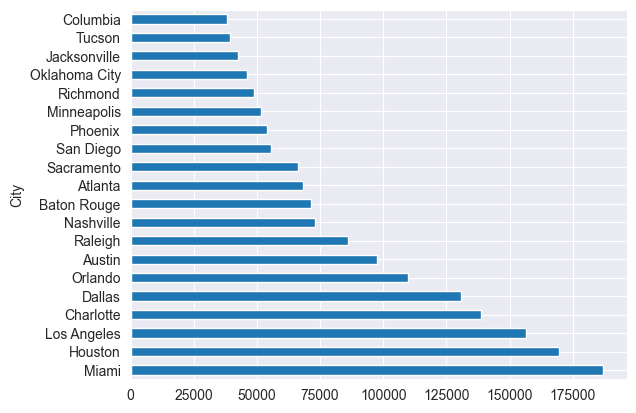

In [13]:
# Prints the top 20
cities_by_accident[:20].plot(kind='barh')

<Axes: xlabel='count', ylabel='Count'>

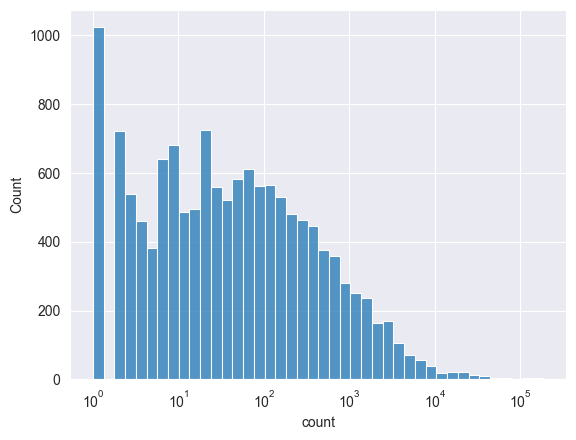

In [14]:
# to check the type of distribution of the data and we draw a distplot
import seaborn as sns
sns.histplot(cities_by_accident,log_scale=True )


<Axes: xlabel='count', ylabel='Count'>

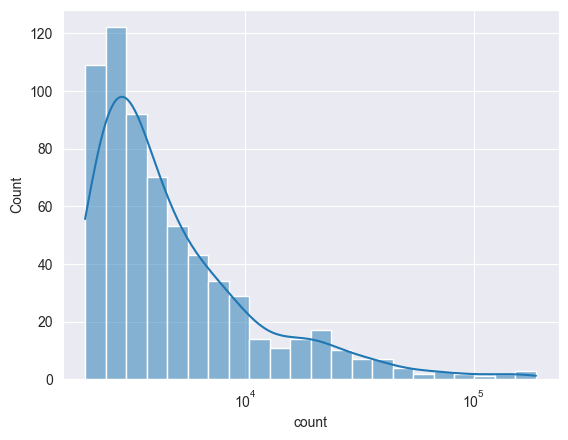

In [15]:
# by seeing the plot we identified that the majority of the cities have accidents less than approximately 2000
# now we create two buckets
high_accident_cities=cities_by_accident[cities_by_accident > 2000]
low_accident_cities=cities_by_accident[cities_by_accident < 2000]

# now we check the len of the cities
len(high_accident_cities)

# which means that
len(high_accident_cities)/len(cities_by_accident)
# only 0.047 percentage of the cities have accidents above 2000

# plotting a dis tplot
sns.histplot(high_accident_cities,kde=True,log_scale=True)

<Axes: xlabel='count', ylabel='Count'>

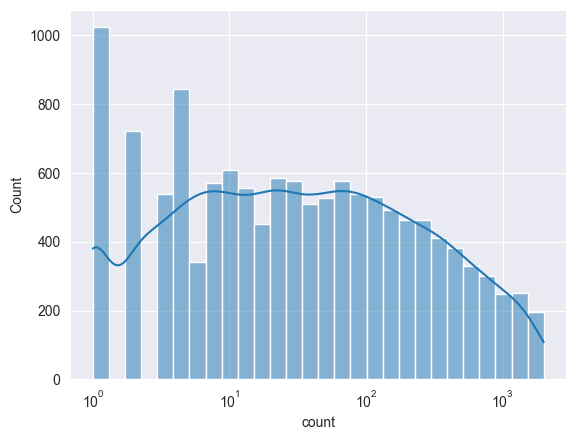

In [16]:
# plotting a dist plot for low_accidents_cities
sns.histplot(low_accident_cities,kde=True,log_scale=True)

In [18]:
len(cities_by_accident==1)

13678

### Start time


In [55]:

(df['Start_Time'].dtype)

datetime64[ns]


/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/3038478460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hour_morning,kde=False,bins=24,norm_hist=True)
/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/3038478460.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

<Axes: xlabel='Start_Time'>

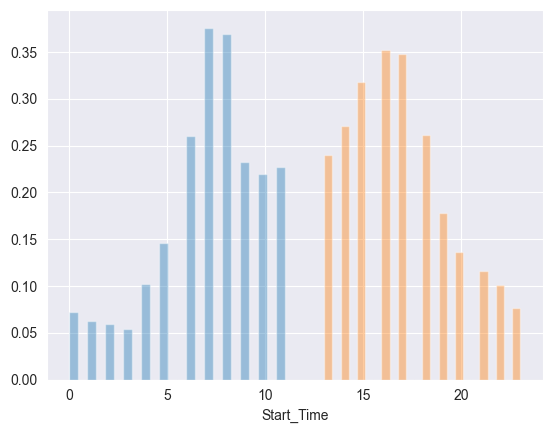

In [82]:
df_hour=df.Start_Time.dt.hour# this gives hours of accidents
# Morning
df_hour_morning=df_hour[df_hour<12]
sns.distplot(df_hour_morning,kde=False,bins=24,norm_hist=True)

# Evening
df_hour_afternoon=df_hour[df_hour>12]
sns.distplot(df_hour_afternoon,kde=False,bins=24,norm_hist=True)

# Bins we kept 24 as we have 24 hours in a day
# This norm_hist in the distplot gives percentages in each

#### Day of the week

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/845250420.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_day,kde=False,bins=24,norm_hist=True)


<Axes: xlabel='Start_Time'>

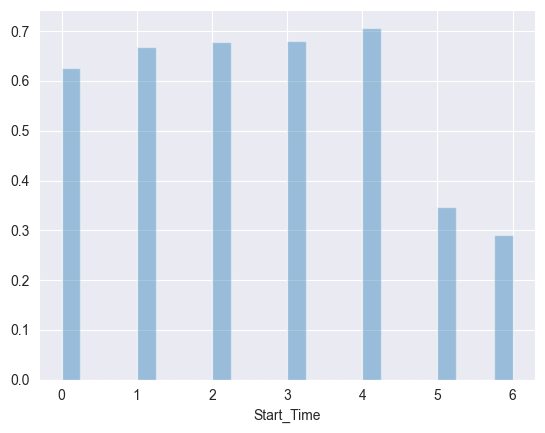

In [89]:
df_day=df.Start_Time.dt.dayofweek
df_day
sns.distplot(df_day,kde=False,bins=24,norm_hist=True)

#### Is the distribution of accidents by hour the same on weekends as on weekdays


/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/1236303796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekends.dt.hour,kde=True,bins=24,norm_hist=True)


<Axes: xlabel='Start_Time', ylabel='Density'>

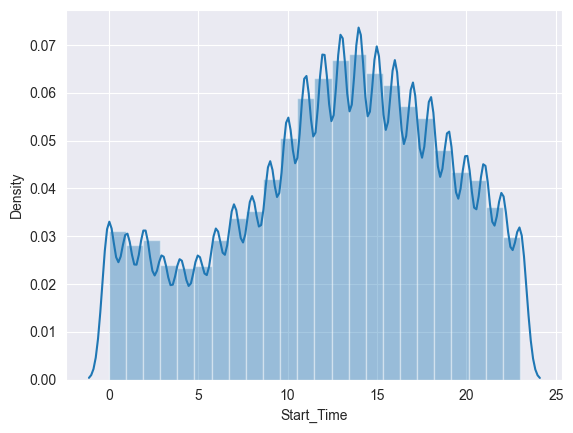

In [102]:
fsundays=df.Start_Time[df.Start_Time.dt.dayofweek==6 ]
saturdays=df.Start_Time[df.Start_Time.dt.dayofweek==5]
weekends=pd.concat([sundays,saturdays])
sns.distplot(weekends.dt.hour,kde=True,bins=24,norm_hist=True)

### On mondays

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/2231802947.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday.dt.hour,kde=False,bins=24,norm_hist=True)


<Axes: xlabel='Start_Time'>

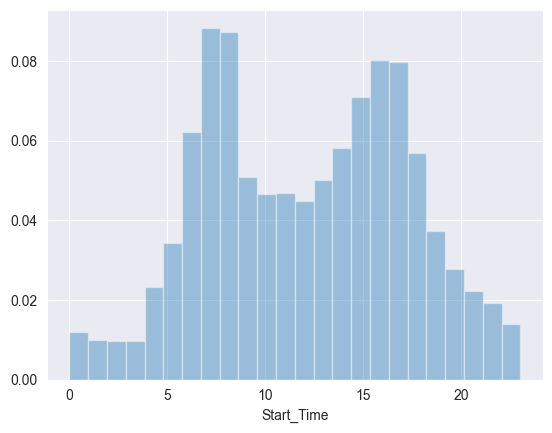

In [100]:
monday=df.Start_Time[df.Start_Time.dt.dayofweek==0 ]
sns.distplot(monday.dt.hour,kde=False,bins=24,norm_hist=True)

## Month

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/1142685633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(month,kde=False,bins=24,norm_hist=True)


<Axes: xlabel='Start_Time'>

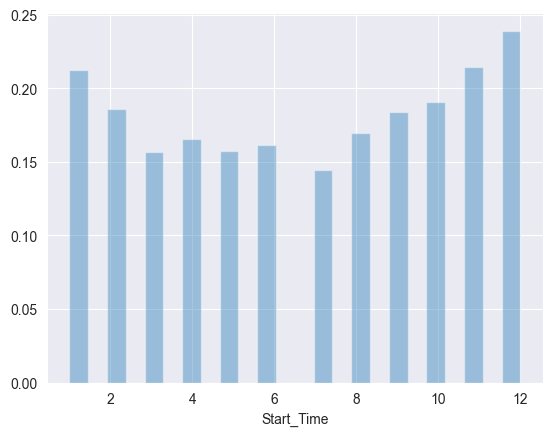

In [108]:
month=df.Start_Time.dt.month
sns.distplot(month,kde=False,bins=24,norm_hist=True)

### Analysing December

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/1949735452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(december.dt.day,kde=False,bins=31,norm_hist=True)


<Axes: xlabel='Start_Time'>

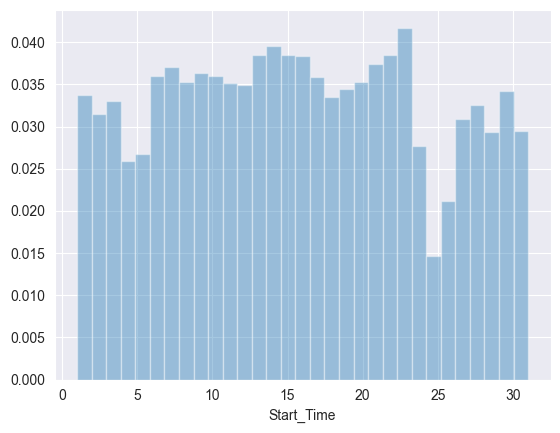

In [113]:
december=df.Start_Time[df.Start_Time.dt.month==12]
sns.distplot(december.dt.day,kde=False,bins=31,norm_hist=True)

### Analysing July

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/2091797113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(july.dt.day,kde=False,bins=31,norm_hist=True)


<Axes: xlabel='Start_Time'>

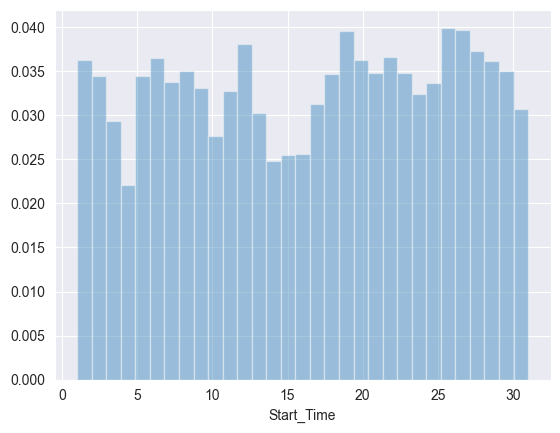

In [114]:
july=df.Start_Time[df.Start_Time.dt.month==7 ]
sns.distplot(july.dt.day,kde=False,bins=31,norm_hist=True)

## Analysing Years

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/1137003055.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(year_2023.dt.month,kde=False,bins=12,norm_hist=True)


<Axes: xlabel='Start_Time'>

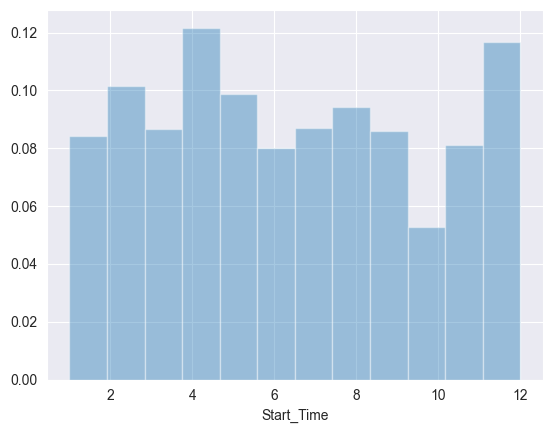

In [133]:
years=df.Start_Time.dt.year

year_2023=df.Start_Time[years==2022]
sns.distplot(year_2023.dt.month,kde=False,bins=12,norm_hist=True)

### Analysing Source

<Axes: ylabel='count'>

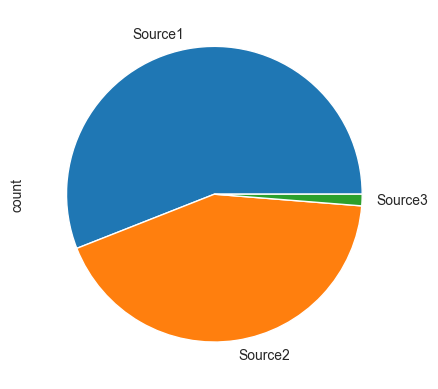

In [138]:
df.Source.value_counts().plot(kind='pie')

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/1084520239.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2022.Start_Time.dt.month,kde=False,bins=12,norm_hist=True)


<Axes: xlabel='Start_Time'>

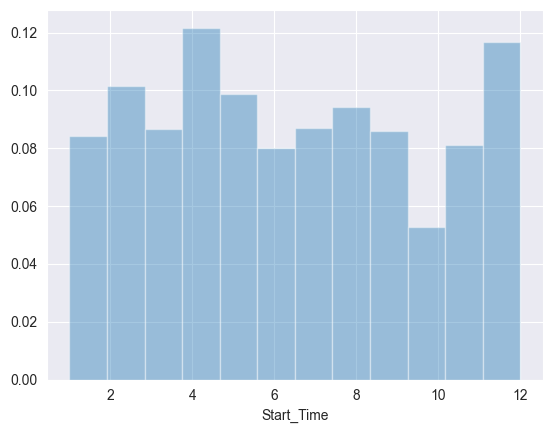

In [170]:
df_2022=df[df.Start_Time.dt.year==2022]
df_2022_Source1=df_2022[df_2022.Source=='Source3']
sns.distplot(df_2022.Start_Time.dt.month,kde=False,bins=12,norm_hist=True)

## Start Latitude and Longitude

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

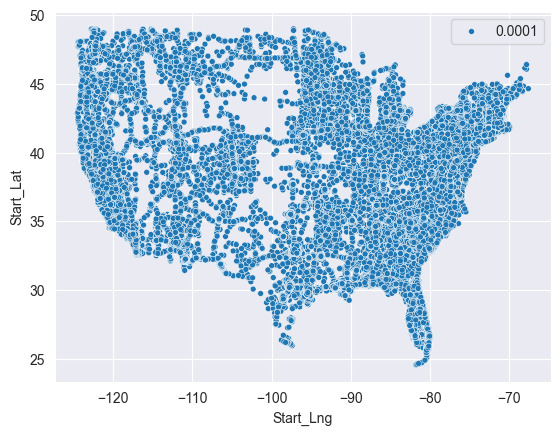

In [190]:
sample_df=df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.0001)

In [187]:
correlation = df['Start_Lng'].corr(df['Start_Lat'])
correlation

np.float64(-0.06772001570913283)

# Now we create a map using the folium library


In [216]:
sample_df_1=df.sample(int(0.01*len(df)))
lat_lon_pairs=list(zip(list(sample_df_1.Start_Lat),list(sample_df_1.Start_Lng)))
import folium
from folium.plugins import HeatMap
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Top 5 states in terms of accidents per capita

In [262]:
df_state_pop=pd.read_csv('us_pop_by_state.csv')
df_state_pop

,rank,state,state_code,2020_census,percent_of_total
0,1.0,California,CA,39538223,0.1191
1,2.0,Texas,TX,29145505,0.0874
2,3.0,Florida,FL,21538187,0.0647
3,4.0,New York,NY,20201249,0.0586
4,5.0,Pennsylvania,PA,13002700,0.0386
5,6.0,Illinois,IL,12801989,0.0382
6,7.0,Ohio,OH,11799448,0.0352
7,8.0,Georgia,GA,10711908,0.0320
8,9.0,North Carolina,NC,10439388,0.0316
9,10.0,Michigan,MI,10077331,0.0301


In [266]:
# First we rename the State_code column so that we can perform merge on the basis of it
df_state_pop.rename(columns={'state_code': 'State'}, inplace=True)


merged_df = pd.merge(df, df_state_pop, on='State', how='left')
merged_df.head()

# merged_df[['2020_census','State']]
# # Grouping by 'State_Code' and counting accidents per state
# accidents_per_state = merged_df.groupby('State').size().reset_index(name='Accidents_Count')
# #
# # # Display the result
# print(accidents_per_state)




,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,rank,state,2020_census,percent_of_total
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,Night,Night,Night,Night,7.0,Ohio,11799448,0.0352
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,Night,Night,Night,Day,7.0,Ohio,11799448,0.0352
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,True,False,Night,Night,Day,Day,7.0,Ohio,11799448,0.0352
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,Night,Day,Day,Day,7.0,Ohio,11799448,0.0352
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,True,False,Day,Day,Day,Day,7.0,Ohio,11799448,0.0352


In [281]:
import pandas as pd

# Rename state_code column in df_state_pop to match 'State' in df
df_state_pop.rename(columns={'state_code': 'State'}, inplace=True)

# Merge the DataFrames on 'State'
merged_df = pd.merge(df, df_state_pop, on='State', how='left')

# Group by 'State' and count accidents
accidents_per_state = pd.DataFrame(merged_df.groupby('State').size().reset_index(name='Accidents_Count').sort_values('Accidents_Count', ascending=False))


merged_df = pd.merge(accidents_per_state, df_state_pop, on='State', how='left')


merged_df['accidents_per_capita']=pd.DataFrame(merged_df['Accidents_Count']/merged_df['2020_census'])

sorted_df = merged_df.sort_values('accidents_per_capita', ascending=False)

# Display the result
print(sorted_df[['State','state' ,'accidents_per_capita']])


   State           state  accidents_per_capita
3     SC  South Carolina              0.074741
0     CA      California              0.044044
9     OR          Oregon              0.042400
1     FL         Florida              0.040867
6     VA        Virginia              0.035139
8     MN       Minnesota              0.033661
5     NC  North Carolina              0.032396
15    LA       Louisiana              0.032140
21    UT            Utah              0.030281
36    DC              DC              0.027018
31    MT         Montana              0.026282
13    TN       Tennessee              0.024221
10    AZ         Arizona              0.023856
7     PA    Pennsylvania              0.022812
17    MD        Maryland              0.022731
23    OK        Oklahoma              0.021126
20    AL         Alabama              0.020111
2     TX           Texas              0.019997
25    CT     Connecticut              0.019691
4     NY        New York              0.017225
14    MI     

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_25544/4034778747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accidents_per_capita', y='State', data=sorted_df, palette='viridis')


<Axes: xlabel='accidents_per_capita', ylabel='State'>

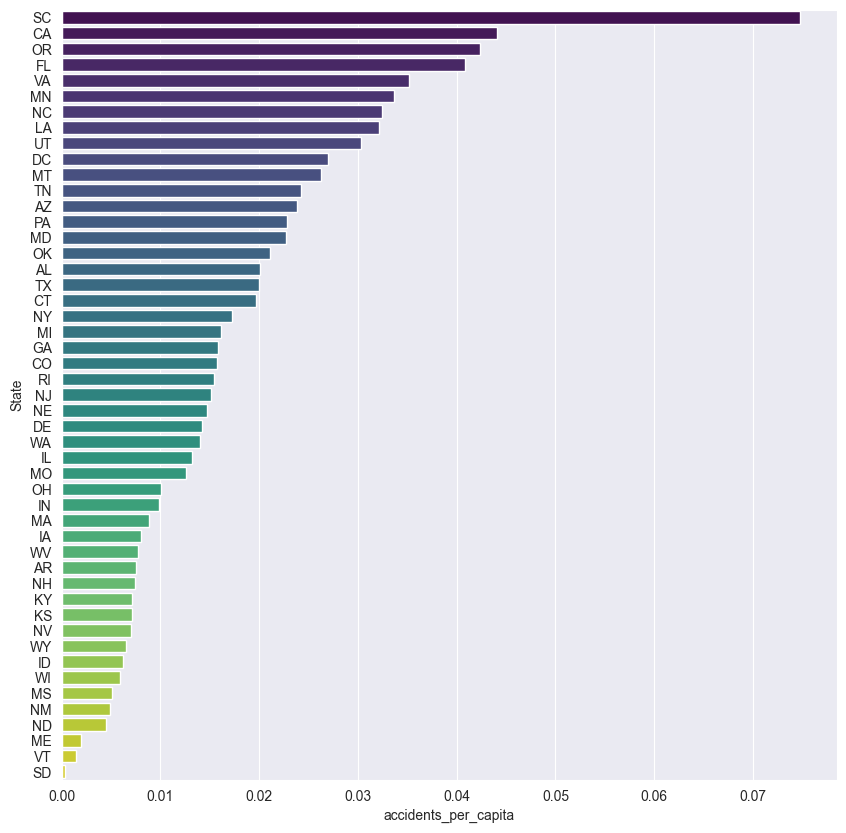

In [280]:
plt.figure(figsize=(10,10))
sns.barplot(x='accidents_per_capita', y='State', data=sorted_df, palette='viridis')

## Ask and answer questions
- Are there more accidents in warmer or colder area
- Which 5 states have the highest number of accidents? How about per capita accients?
- Does New York show up in the data? If yes then why is the count lower in the data?
- Among the top 100 cities in number of accidents, which state do they belong to?
- What time of the day are accidents more frequent in?
- Which days of the week has most accidents
- Which month has the most accidents?
- Which year has the most accidents?
- How is traffic related to accidents

## Summary and Conclusion

### Insights:
- No data from New York
- Less than 5 percentage of cities has more than 2000 yearly accidents
- Over 1300 cities have reported over 1 accidents only
- No of accidents per city decreases/increases exponentially
- Most accidents happen between 7 to 9 am in the  morning and 4-6 pm in the evening
- On weekends the no of accidents are surprisingly low and we see a deviation from the normal days which are evenly distributed
- Maximum accidents occur on Fridays
- On Sundays the accident distribution is quite dispersed and the peak occurs between 12 am to 3 pm unlike weekdays
- Maximum accidents occur in December and minimum accidents occur in July
- In the month of December the minimum accidents occur on the day of Christmas which is 25th of December(probably because most of the people are celebrating christmas at their homes)
- In the months of July the minimum accidents occur on the Independence day which is July 4th
- More accidents occur in winters than in summers
- Most accidents occurred in 2022 while all the data of accidents across all the respectively years are mostly well distributed
- Data for 2023 is missing for 9 months
- By analysing sources we understand that all the sources are almost reliable
- The start latitude and the start longitude are negatively correlated
- By looking the map the density of accidents on the coasts is lot higher than in the middle of the country
- By analysing population data we understand that top 5 states having highest accidents per capita are
> - South Carolina
> - California
> - Oregon
> - Florida
> - Virgina

# Learning
- Whenever we see an exponentially decreasing curve we use the hist_plot and then use the log_scale=True so that we receive a good output
- To use maps we can easliy use the folium library